In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!pip install openpyxl


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 2.9 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [6]:
# Preprocessing
df = pd.read_excel('CB-Insights_Global-Unicorn-Club_2024.xlsx')

In [12]:
df = df.drop('Unnamed: 0', axis=1)

In [23]:
df = df.rename(columns={df.columns[0]: 'Company',
                        df.columns[1]: 'Valuation ($B)',
                        df.columns[2]: 'Date Joined',
                        df.columns[3]: 'Country',
                        df.columns[4]: 'City',
                        df.columns[5]: 'Industry',
                        df.columns[6]: 'Select Investors'})


In [34]:
df_company_cleaned = df.dropna(subset='Company').drop(1)

In [37]:
df_company_cleaned

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
2,ByteDance,225,2017-04-07 00:00:00,China,Beijing,Media & Entertainment,"Sequoia Capital China, SIG Asia Investments, S..."
3,SpaceX,150,2012-12-01 00:00:00,United States,Hawthorne,Industrials,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
4,OpenAI,80,2019-07-22 00:00:00,United States,San Francisco,Enterprise Tech,Khosla Ventures
5,SHEIN,66,2018-07-03 00:00:00,Singapore,NaN,Consumer & Retail,"Tiger Global Management, Sequoia Capital China..."
6,Stripe,65,2014-01-23 00:00:00,United States,San Francisco,Financial Services,"Khosla Ventures, LowercaseCapital, capitalG"
...,...,...,...,...,...,...,...
1226,LinkSure Network,1,2015-01-01 00:00:00,China,Shanghai,Industrials,NaN
1227,InMobi,1,2014-12-02 00:00:00,India,Bengaluru,Enterprise Tech,"Kleiner Perkins Caufield & Byers, Softbank Cor..."
1228,TechStyle Fashion Group,1,2014-08-29 00:00:00,United States,El Segundo,Consumer & Retail,"Matrix Partners, Passport Capital, Rho Ventures"
1229,Snapdeal,1,2014-05-21 00:00:00,India,New Delhi,Consumer & Retail,"SoftBankGroup, Blackrock, Alibaba Group"


Text(0, 0.5, '# of current companies with that valuation')

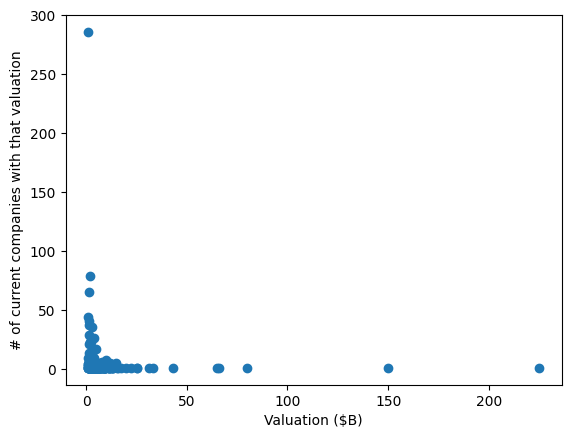

In [64]:
values = df_company_cleaned['Valuation ($B)'].value_counts()
plt.scatter(values.index, values.values)
plt.xlabel("Valuation ($B)")
plt.ylabel("# of current companies with that valuation")

In [70]:
df_company_cleaned['Date Joined']

2       2017-04-07 00:00:00
3       2012-12-01 00:00:00
4       2019-07-22 00:00:00
5       2018-07-03 00:00:00
6       2014-01-23 00:00:00
               ...         
1226    2015-01-01 00:00:00
1227    2014-12-02 00:00:00
1228    2014-08-29 00:00:00
1229    2014-05-21 00:00:00
1230    2013-10-10 00:00:00
Name: Date Joined, Length: 1229, dtype: object

(array([  1.,   0.,   0.,   3.,   7.,  25.,  31.,  61., 138., 121.]),
 array([13696. , 14189.1, 14682.2, 15175.3, 15668.4, 16161.5, 16654.6,
        17147.7, 17640.8, 18133.9, 18627. ]),
 <BarContainer object of 10 artists>)

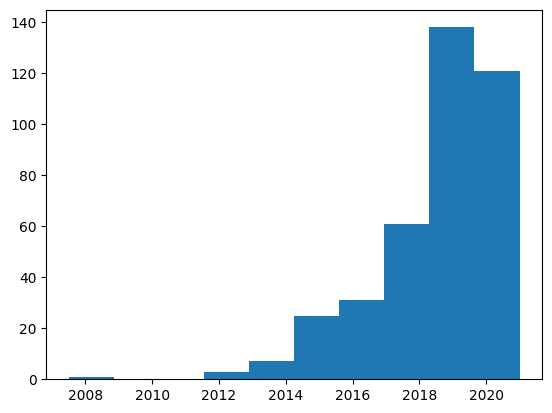

In [75]:
df_pre2021 = df_company_cleaned[pd.to_datetime(df_company_cleaned['Date Joined']) < '2021-01-01']
plt.hist(df_pre2021['Date Joined'])

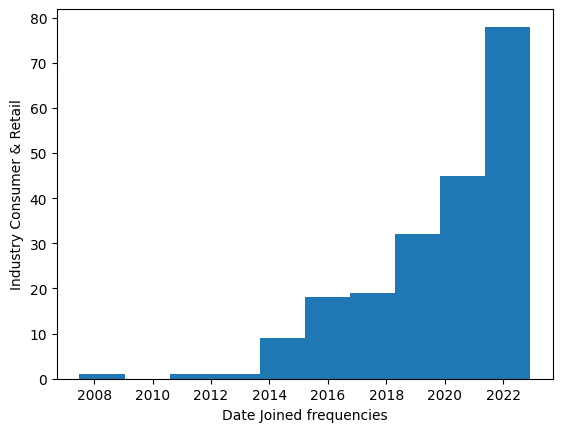

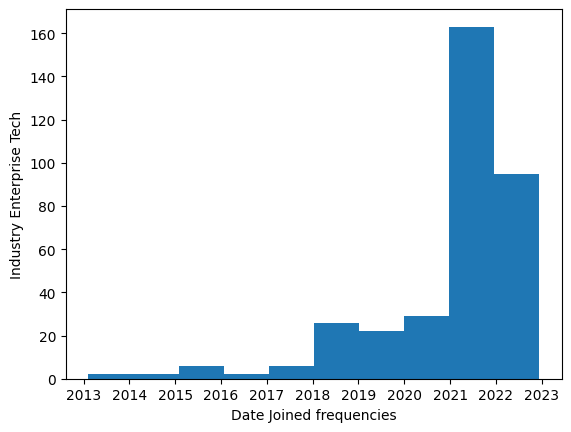

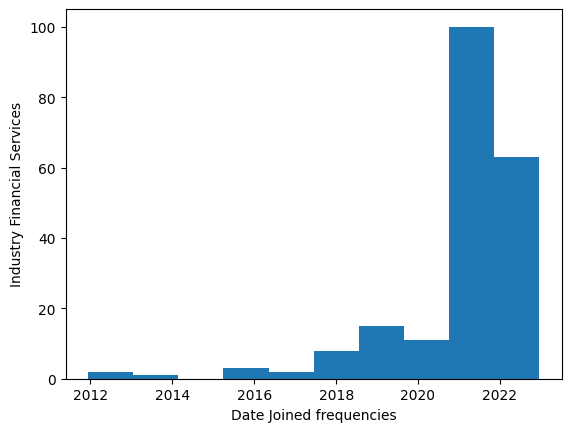

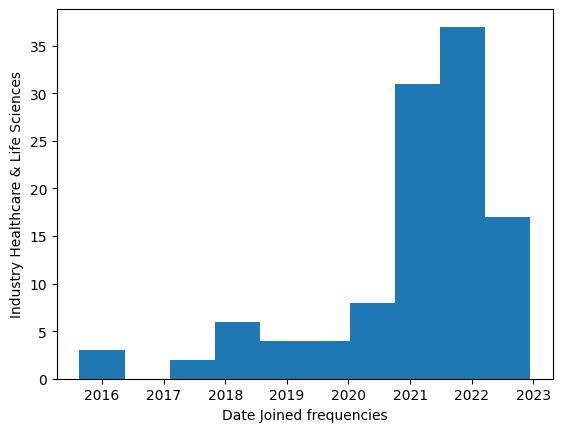

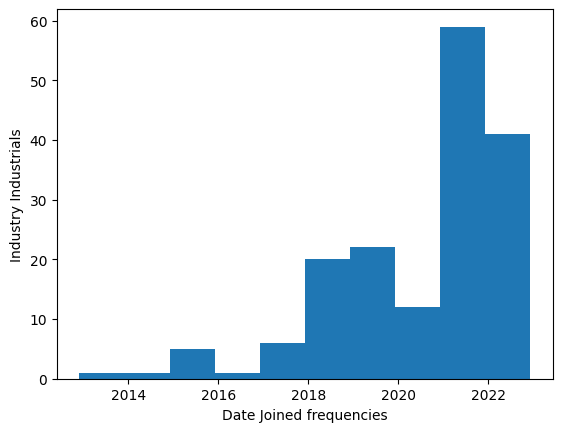

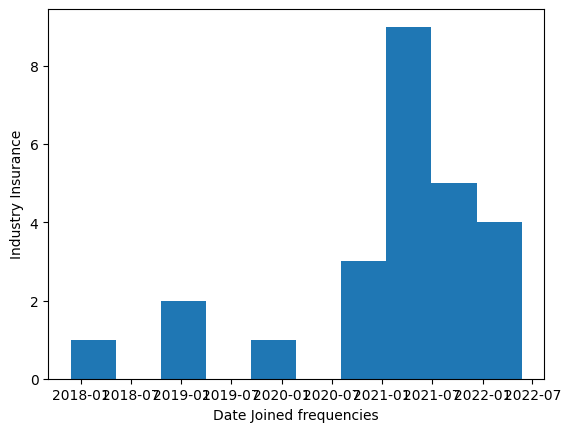

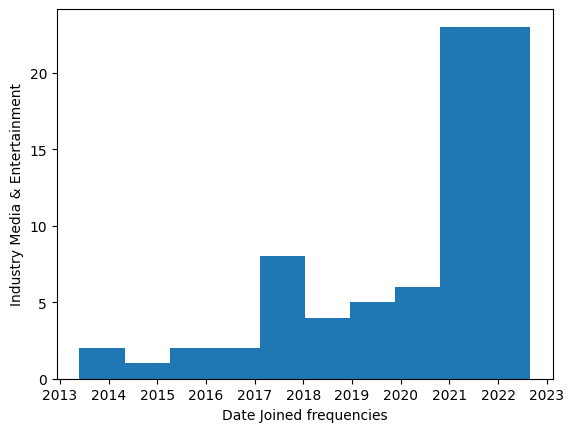

In [108]:
def plot_group(industry_group):
    print(industry_group.groups)
    industry_name, industry = industry_group
    print(industry_name)
    industry['Date Joined'] = pd.to_datetime(industry['Date Joined'], errors='coerce', format='%Y-%m-%d')
    industry = industry.dropna(subset=['Date Joined'])  # Remove rows with invalid dates
    industry_pre2023 = industry[industry['Date Joined'] < '2023-01-01']
    plt.hist(industry_pre2023['Date Joined'])
    plt.show()
    return industry_pre2023
# plot_industry_func = lambda industry: plt.hist(industry[pd.to_datetime(industry) < '2023-01-01'].DateJoined)

industry_groups = df_company_cleaned.groupby('Industry')[['Date Joined']]

for industry in industry_groups.groups.keys():
    df_industry = industry_groups.get_group(industry)
    df_industry = df_industry[pd.to_datetime(df_industry['Date Joined']) < '2023-01-01']
    plt.hist(df_industry['Date Joined'])

    plt.xlabel("Date Joined frequencies")
    plt.ylabel("Industry {}".format(industry))
    
    plt.show()

    
